In [53]:
%matplotlib inline
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from esio import ice_plot
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import datetime

In [54]:
ds = xr.open_dataset('/home/disk/sipn/nicway/data/obs/snow/SUMup_datasets_july2018_snowonseaice.nc')
ds = ds.where(ds!=-9999)

In [71]:
new_time = []
for t in ds.Date.values:
    if np.isnan(t):
        new_time.append(np.NaN)
    else:
        new_time.append(datetime.datetime.strptime(str(int(t)), '%Y%m%d'))
ds.coords['Date'] = new_time                   


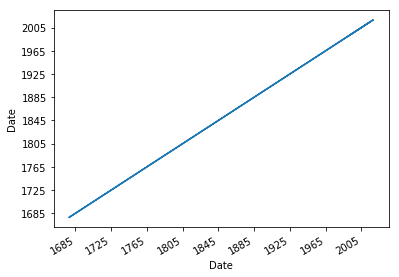

In [73]:
ds.Date.plot()

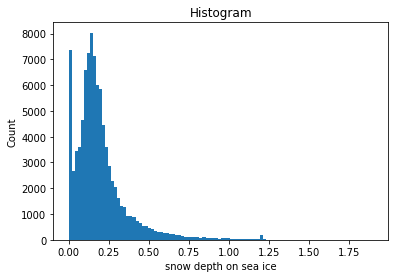

In [17]:
ds.Snow_Depth.plot.hist(bins=100);

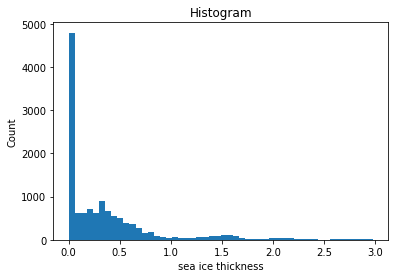

In [42]:
ds.Sea_Ice_Thickness.where(ds.Sea_Ice_Thickness<3).plot.hist(bins=50);

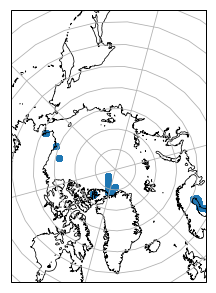

In [32]:
(f, ax) = ice_plot.polar_axis()
plt.scatter(ds.Longitude.values, ds.Latitude.values, transform=ccrs.PlateCarree())